In [1]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd 

https://www.kaggle.com/code/abhijitbiswas040/kmeans-hierarchial-clustering/script

In [6]:
dataset = pd.read_csv('CC GENERAL.csv')  

In [7]:
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
dataset['CREDIT_LIMIT'].fillna(dataset.CREDIT_LIMIT.median(), inplace = True)

In [10]:
dataset['MINIMUM_PAYMENTS'].fillna(dataset.MINIMUM_PAYMENTS.median(), inplace = True)

In [12]:
dataset.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
dataset.drop(['CUST_ID'], axis= 1, inplace = True)

In [14]:
X = dataset.iloc[:,:].values  

In [15]:
from sklearn.preprocessing import StandardScaler
standardscaler= StandardScaler()
X = standardscaler.fit_transform(X)

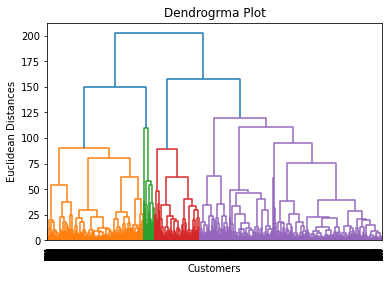

In [16]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(X, method="ward"))  
mtp.title("Dendrogrma Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Customers")  
mtp.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
D_cluster = AgglomerativeClustering(n_clusters= 2)

In [18]:
X_D=D_cluster.fit(X)

In [21]:
Y_pred_D = D_cluster.fit_predict(X)

In [28]:
df_ypred=pd.DataFrame(Y_pred_D)

In [32]:
df_ypred[0].unique()

array([0, 1], dtype=int64)